In [4]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
start_dates = []
end_dates = []
for _ in range(2010,2018+1):
    start_date = str(_) + "-09-01"
    start_dates.append(start_date)
    end_date = str(_) + "-12-20"
    end_dates.append(end_date)
    
tickers_str = ["WMT","AMZN","EBAY","TGT","SPY"]
ticker = "SPY"
year = "2018"

In [3]:
start_date,end_date = year + "-01-01", str(int(year)+1) + "-01-31"
data = yf.download(ticker , start = start_date , end = end_date)
data['Daily_return']=data['Close']/data['Close'].shift(1)-1
data['Daily_return_pct'] = data['Close'].pct_change(1)
data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
# Cumulative Returns
data[ ticker] = np.cumsum(data['Daily_return'])

[*********************100%***********************]  1 of 1 completed


In [4]:
data.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Daily_return        float64
Daily_return_pct    float64
Daily_return_log    float64
SPY                 float64
dtype: object

In [25]:
def cumulative_return(year:int,tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    year = str(year)
    for ticker in tickers:
        start_date,end_date = str(int(year)-5) + "-01-01", year + "-12-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        data['Daily_return_pct'] = data['Close'].pct_change(1)
        data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
        # Cumulative Returns
        data[ticker] = np.cumsum(data['Daily_return'])
        data[ticker][1:].plot() # skip first line
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

[*********************100%***********************]  1 of 1 completed


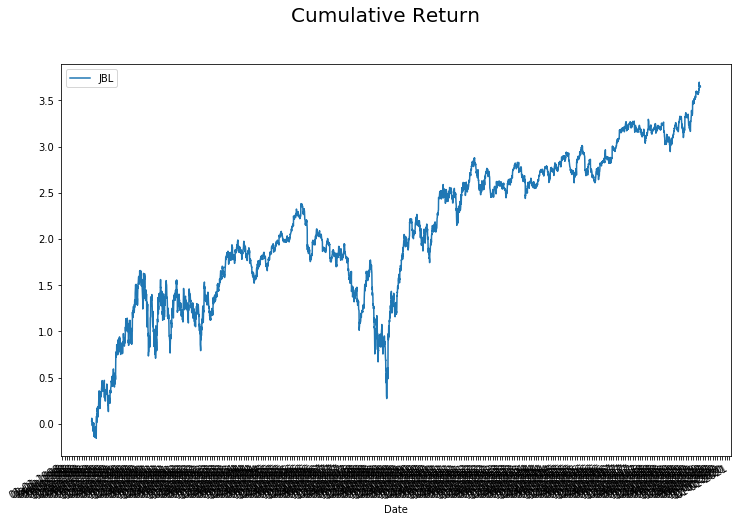

In [35]:
cumulative_return(2019, ['JBL'])

In [21]:
def cumulative_return_quarter(tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    ret = 0
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    for year in range(2010, 2020):
        year = str(year)
        for ticker in tickers:
            start_date,end_date = year + "-01-01", year + "-12-31"
            data = yf.download(ticker , start = start_date , end = end_date)
            data['Daily_return']=data['Close']/data['Close'].shift(1)-1
            data['Daily_return_pct'] = data['Close'].pct_change(1)
            data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
            # Cumulative Returns
            data[ticker + year] = np.cumsum(data['Daily_return'])
            data[ticker + year][1:].plot() # skip first line
            print("{} {} {}".format(ticker,year, data[ticker + year][-1]))
            ret +=  data[ticker + year][-1]
    print(ret)
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

cumulative_return_quarter(['SPY'])

In [15]:
def bollinger_band(mean_window: int, std_dev_window: int, tickers: [str], start_year: int, end_year: int):
    import matplotlib.pyplot as plt
    %matplotlib inline
    for ticker in tickers:
        start_date, end_date = str(start_year) + "-01-01",  str(end_year) + "-12-31"
        df = yf.download(ticker , start = start_date , end = end_date)
        MA_col_name = str(mean_window) + '_MA_Close'
        std_dev_col_name = str(std_dev_window) + '_std_close'
        df[MA_col_name] = df['Close'].rolling(window=mean_window).mean()
        #calculating 20 days rolling standard devtaion
        df[std_dev_col_name] = df['Close'].rolling(window=std_dev_window).std()
        df['Upper'] = df[MA_col_name] + 2*df[std_dev_col_name]
        df['Lower'] = df[MA_col_name] - 2*df[std_dev_col_name]
        df[['Close',MA_col_name,'Upper','Lower']].plot(figsize=(10,5))
        plt.suptitle(ticker, fontsize=20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


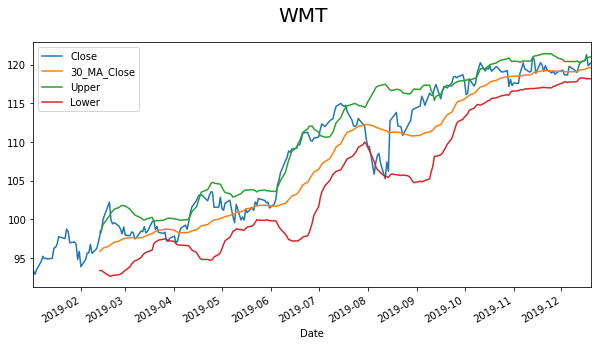

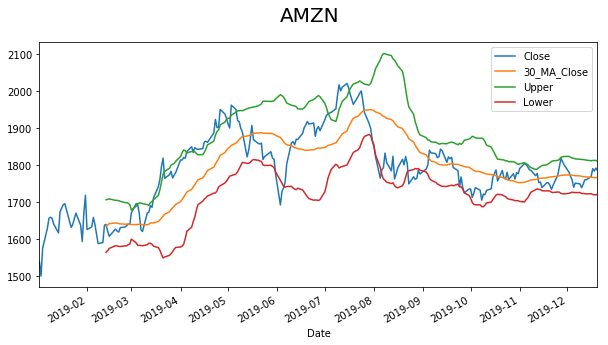

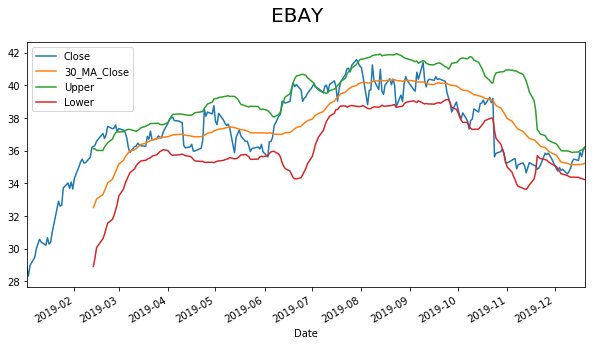

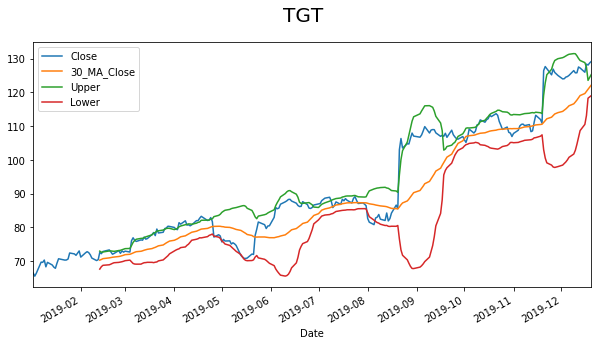

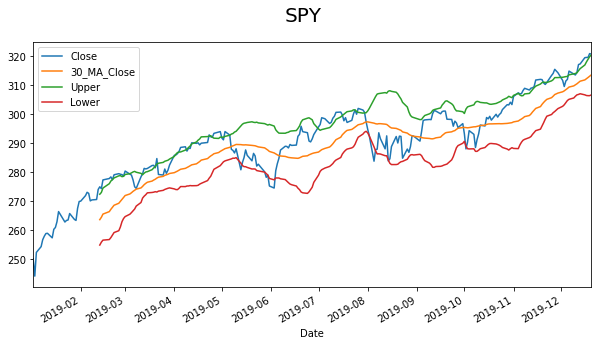

In [40]:
bollinger_band(30, 20, tickers_str,2019,2019)

In [44]:
def cumulative_return_adjusted(year:int,tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    year = str(year)
    for ticker in tickers_str:
        start_date,end_date = year + "-01-01", str(int(year)+1) + "-01-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        dividends = pd.DataFrame(yf.Ticker(ticker).dividends)
        print(dividends.head())
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        data['Daily_return_pct'] = data['Close'].pct_change(1)
        data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
        # Cumulative Returns
        data[ ticker] = np.cumsum(data['Daily_return'])
        data[ ticker][1:].plot() # skip first line
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

https://aroussi.com/post/worlds-best-strategy
Analysis of the strategy:
1. Hold GLD (SPDR Gold Trust ETF) from December 20 of every year through February 20 of the following year, and during August.
2. The rest of the time hold SPLV (Invesco S&P 500 Low Volatility ETF)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

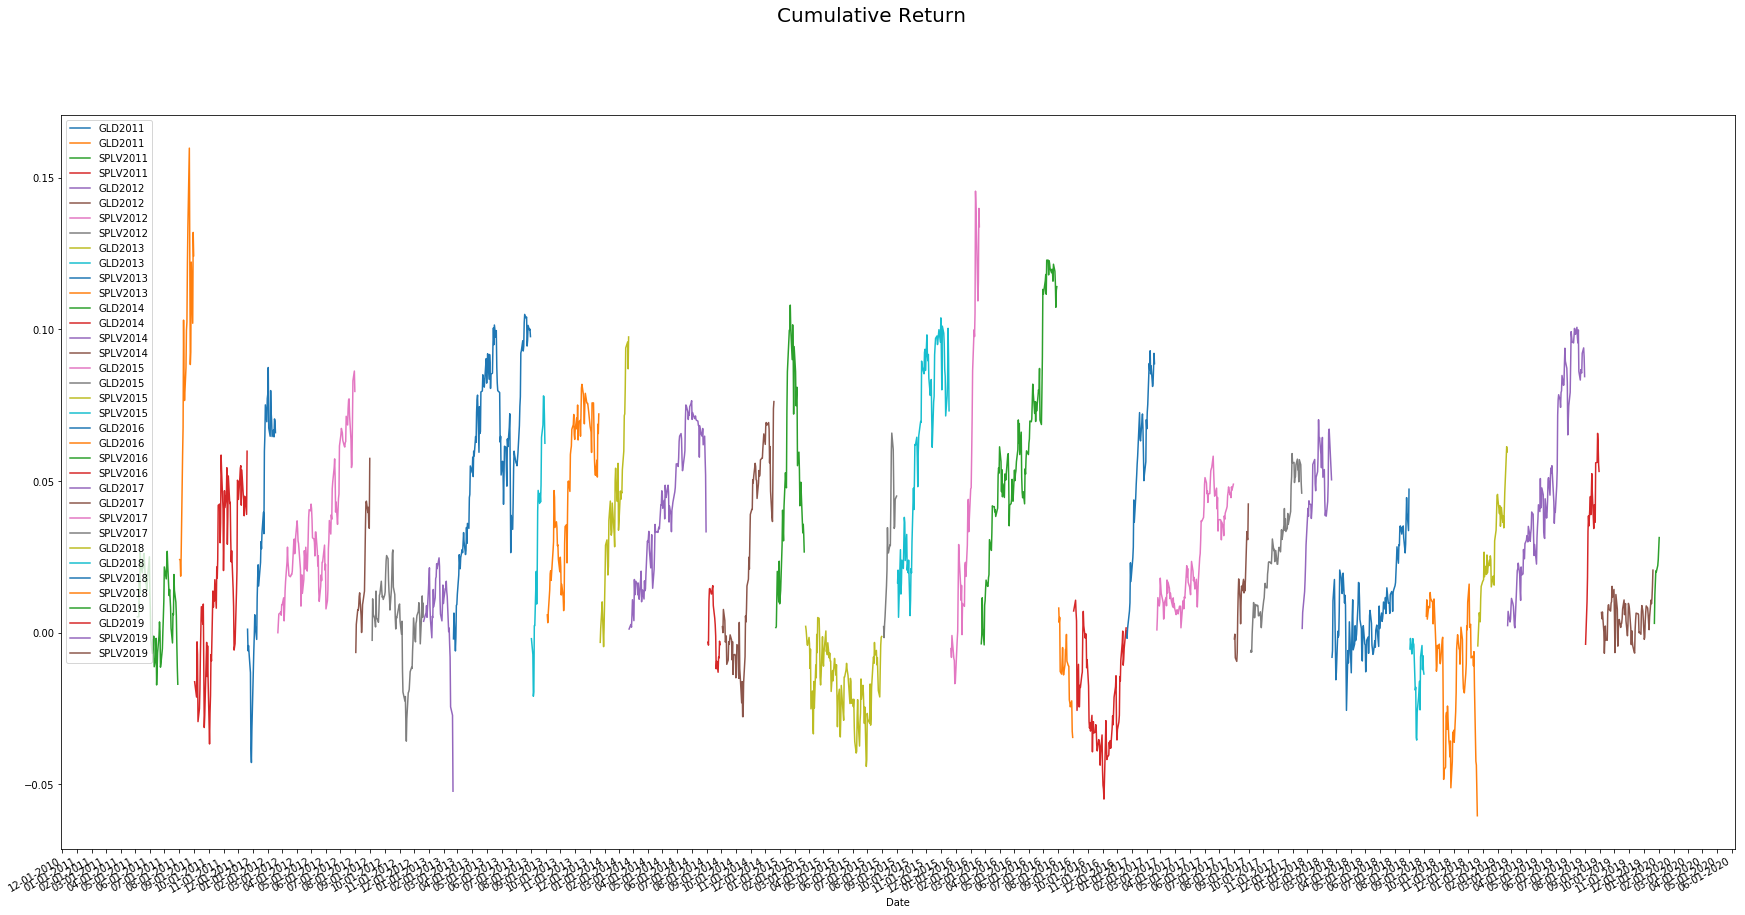

In [35]:
def cumulative_return_GLD_SPLV():
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    ret = 0
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    for year in range(2011, 2020):
        year = str(year)
        # Buy GLD 12/20 / Sell 2-20
        GLD_start_date,GLD_end_date = year + "-12-20", str(int(year)+1) + "-02-20"
        GLD_data = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        GLD_data['Daily_return']=GLD_data['Close']/GLD_data['Close'].shift(1)-1
        GLD_data["GLD" + year] = np.cumsum(GLD_data['Daily_return'])
        GLD_data["GLD" + year][1:].plot() # skip first line
        ret += GLD_data["GLD" + year][-1]
        # Buy GLD for August
        GLD_start_date,GLD_end_date = year + "-08-01", year + "-08-31"
        GLD_data = yf.download("GLD" , start = GLD_start_date , end = GLD_end_date)
        GLD_data['Daily_return']=GLD_data['Close']/GLD_data['Close'].shift(1)-1
        GLD_data["GLD" + year] = np.cumsum(GLD_data['Daily_return'])
        GLD_data["GLD" + year][1:].plot() # skip first line
        ret += GLD_data["GLD" + year][-1]
        SPLV_start_date,SPLV_end_date = year + "-02-20", year + "-07-31"
        # Buy SPLV the rest of the time
        SPLV_data = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        SPLV_data['Daily_return']=SPLV_data['Close']/SPLV_data['Close'].shift(1)-1
        SPLV_data["SPLV" + year] = np.cumsum(SPLV_data['Daily_return'])
        SPLV_data["SPLV" + year][1:].plot() # skip first line
        ret += SPLV_data["SPLV" + year][-1]
        SPLV_start_date,SPLV_end_date = year + "-09-01", year + "-12-20"
        SPLV_data = yf.download("SPLV" , start = SPLV_start_date , end = SPLV_end_date)
        SPLV_data['Daily_return']=SPLV_data['Close']/SPLV_data['Close'].shift(1)-1
        SPLV_data["SPLV" + year] = np.cumsum(SPLV_data['Daily_return'])
        SPLV_data["SPLV" + year][1:].plot() # skip first line
        ret += SPLV_data["SPLV" + year][-1]
        
    print(" Cumulative Returns for GLD/SPLV strategy: {} ".format(ret))
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

cumulative_return_GLD_SPLV()

In [32]:
def cumulative_return(start_year:int, end_year: int, tickers:[str]):
    import matplotlib.pyplot as plt
    from matplotlib.dates import DateFormatter
    import matplotlib.dates as mdates
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%Y"))
    for ticker in tickers:
        start_date,end_date = str(start_year) + "-01-01", str(end_year) + "-12-31"
        data = yf.download(ticker , start = start_date , end = end_date)
        data['Daily_return']=data['Close']/data['Close'].shift(1)-1
        data['Daily_return_pct'] = data['Close'].pct_change(1)
        data['Daily_return_log'] = np.log(data['Close']/data['Close'].shift(1))
        # Cumulative Returns
        data[ticker] = np.cumsum(data['Daily_return'])
        data[ticker][1:].plot() # skip first line
    
        print(" Cumulative Returns for {}: {} ".format(ticker, data[ticker][-1]))
    plt.legend()
    plt.suptitle('Cumulative Return', fontsize=20)

[*********************100%***********************]  1 of 1 completed
 Cumulative Returns for SPLV: 0.9146314038072332 
[*********************100%***********************]  1 of 1 completed
 Cumulative Returns for SPY: 1.0224494096561476 


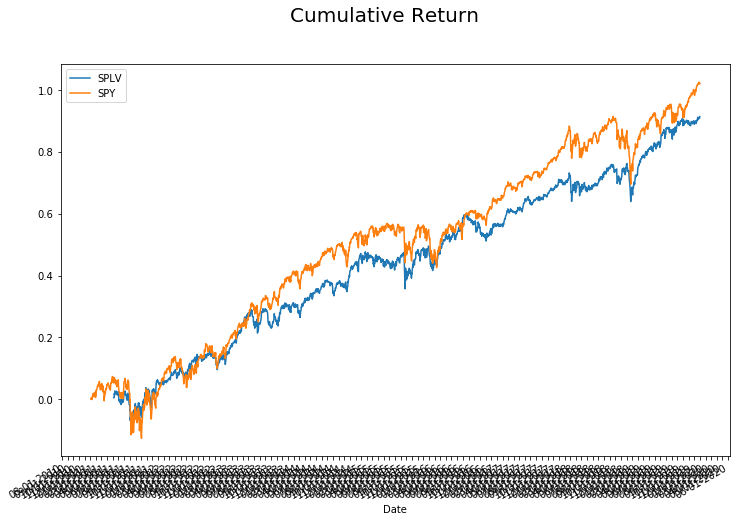

In [34]:
cumulative_return(2011, 2019 ,["SPLV","SPY"])